In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


* ytrain and xtrain

In [3]:
ytrain= train.SalePrice
xtrain= train.drop('SalePrice', axis = 1)
Result=test[['Id']]

* SHAPE

In [4]:
print ("Train data shape:", xtrain.shape)
print ("Test data shape:", test.shape)

Train data shape: (1460, 80)
Test data shape: (1459, 80)


* Correlation between features

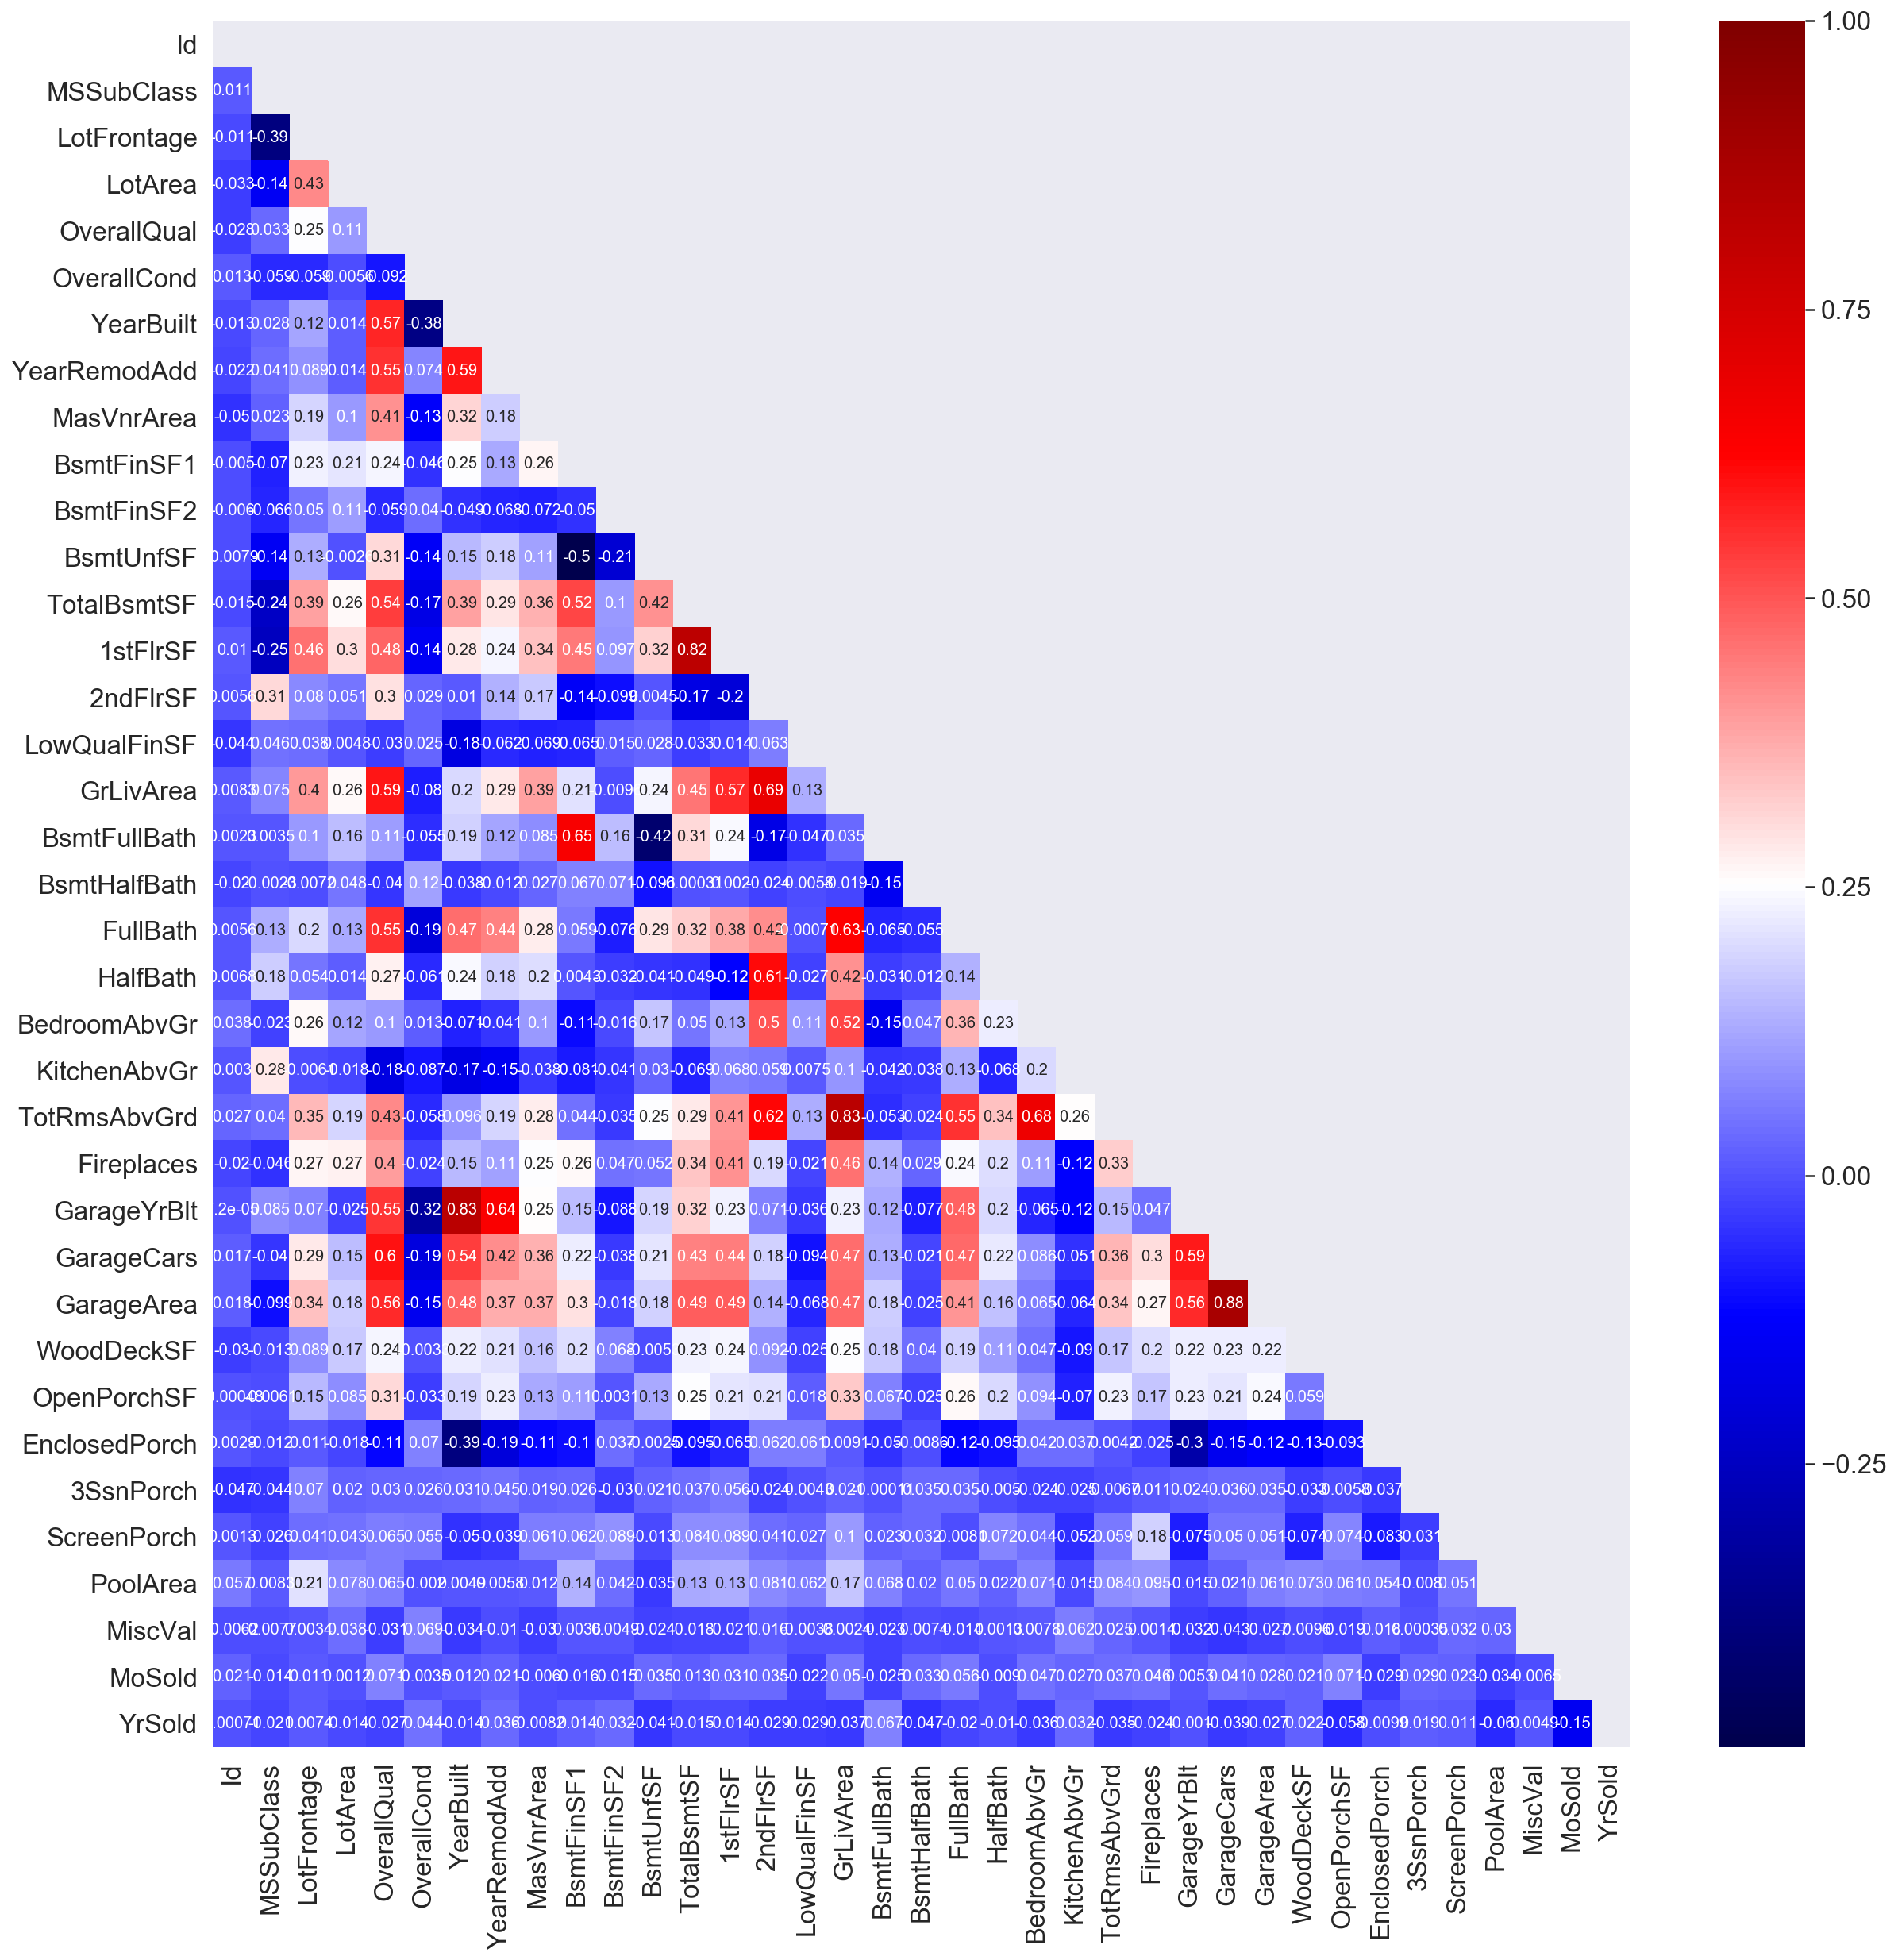

 the correlations between all features 


In [5]:
mask = np.zeros_like(xtrain.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig=plt.figure(figsize=(20,20))
sns.heatmap(xtrain.corr(), annot=True, cmap="seismic", mask=mask)
plt.show()
print(' the correlations between all features ')

* as Color gets Darker correlation gets stronger

* Defined a function print out the value count of each column

In [6]:
def cato_count(data1,data2):
    i=data1.columns
    for n in i:
        try:
            int(data1[n][1])
        except:
            print('the column is ', n)
            print('items in first ')
            print(data1[n].value_counts())
            print('items in secund')
            print(data2[n].value_counts())

In [7]:
cato_count(train,test)

the column is  MSZoning
items in first 
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
items in secund
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64
the column is  Street
items in first 
Pave    1454
Grvl       6
Name: Street, dtype: int64
items in secund
Pave    1453
Grvl       6
Name: Street, dtype: int64
the column is  Alley
items in first 
Grvl    50
Pave    41
Name: Alley, dtype: int64
items in secund
Grvl    70
Pave    37
Name: Alley, dtype: int64
the column is  LotShape
items in first 
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
items in secund
Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64
the column is  LandContour
items in first 
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
items in secund
Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: in

Name: GarageFinish, dtype: int64
the column is  GarageQual
items in first 
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
items in secund
TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64
the column is  GarageCond
items in first 
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
items in secund
TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: GarageCond, dtype: int64
the column is  PavedDrive
items in first 
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64
items in secund
Y    1301
N     126
P      32
Name: PavedDrive, dtype: int64
the column is  PoolQC
items in first 
Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64
items in secund
Ex    2
Gd    1
Name: PoolQC, dtype: int64
the column is  Fence
items in first 
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
items in secund
MnPrv    172
GdPrv     59
GdWo      58
MnWw       1
Name: F

* utlities will be drop since it is almost the same number in both catagories
* merged 2 data 

In [8]:
x=pd.concat([xtrain,test],axis=0)

In [9]:
x.shape

(2919, 80)

In [10]:
x.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

* Defined a Function prints out the value count of the column with null values 

In [11]:
def none_null(data):
    i=data.columns
    for n in i:
        if data[n].isnull().sum()!=0:
            print('the column is ', n)
            print('the null= ' ,data[n].isnull().sum())
            print(data[n].value_counts())          

In [12]:
none_null(x)

the column is  MSZoning
the null=  4
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
the column is  LotFrontage
the null=  486
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
65.0      93
85.0      76
21.0      50
24.0      49
63.0      47
78.0      46
90.0      46
68.0      44
64.0      43
74.0      39
72.0      39
73.0      33
62.0      31
52.0      28
100.0     28
82.0      28
79.0      28
51.0      27
59.0      27
57.0      26
66.0      26
76.0      25
53.0      24
55.0      24
43.0      23
        ... 
140.0      2
122.0      2
116.0      2
149.0      2
150.0      2
174.0      2
25.0       1
123.0      1
135.0      1
111.0      1
117.0      1
131.0      1
200.0      1
22.0       1
136.0      1
28.0       1
31.0       1
133.0      1
155.0      1
153.0      1
126.0      1
152.0      1
168.0      1
144.0      1
138.0      1
137.0      1
182.0      1
119.0      1
195.0      1
141.0      1
Name: LotFrontage, 

* Filling missing values 

In [13]:
x["Utilities"].fillna("AllPub", inplace = True) 
x["Exterior1st"].fillna("VinylSd", inplace = True) 
x["Exterior2nd"].fillna("VinylSd", inplace = True) 
x["BsmtFinSF1"].fillna(0.0, inplace = True) 
x["BsmtFinSF2"].fillna(0.0, inplace = True) 
x["BsmtUnfSF"].fillna(0.0, inplace = True) 
x["TotalBsmtSF"].fillna(0.0, inplace = True) 
x["BsmtFullBath"].fillna(0.0, inplace = True) 
x["BsmtHalfBath"].fillna(0.0, inplace = True)
x["Functional"].fillna('Typ', inplace = True) 
x["GarageArea"].fillna(0.0, inplace = True) 
x["GarageCars"].fillna(0.0, inplace = True) 
x["SaleType"].fillna('WD', inplace = True) 


In [14]:
x.MiscFeature.fillna('Non', inplace = True)
x['PoolQC'][960] = 'Gd'
x['PoolQC'][1043] = 'Gd'
x['PoolQC'][1139] = 'Gd'


In [15]:
x["Fence"].fillna("No Fence", inplace = True) 
x["Alley"].fillna("No Alley", inplace = True) 
x['MasVnrType'].fillna("CBlock", inplace = True) 
x['MasVnrType'].fillna("CBlock", inplace = True) 
x['BsmtFinType1'].fillna('No Basment', inplace = True)
x['BsmtFinType2'].fillna('No Basment', inplace = True)
x['FireplaceQu'].fillna('No Fireplace', inplace = True)
x['GarageType'].fillna('No Garage', inplace = True)
x['GarageYrBlt'].fillna(0, inplace = True)
x['GarageFinish'].fillna('No Garage', inplace=True)
x['GarageQual'].fillna('No Garage', inplace=True)
x['GarageCond'].fillna('No Garage', inplace = True)
x['Fence'].fillna('No Fence', inplace = True)

In [24]:
x.MSZoning.value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [25]:
x.LotFrontage.value_counts()

74.102063     486
60.000000     276
80.000000     137
70.000000     133
50.000000     117
75.000000     105
65.000000      93
85.000000      76
21.000000      50
24.000000      49
63.000000      47
90.000000      46
78.000000      46
68.000000      44
64.000000      43
72.000000      39
74.000000      39
73.000000      33
62.000000      31
82.000000      28
52.000000      28
79.000000      28
100.000000     28
51.000000      27
59.000000      27
66.000000      26
57.000000      26
76.000000      25
55.000000      24
53.000000      24
             ... 
140.000000      2
150.000000      2
149.000000      2
116.000000      2
122.000000      2
313.000000      2
182.000000      1
153.000000      1
195.000000      1
119.000000      1
117.000000      1
133.000000      1
111.000000      1
138.000000      1
123.000000      1
144.000000      1
135.000000      1
155.000000      1
131.000000      1
141.000000      1
126.000000      1
200.000000      1
22.000000       1
136.000000      1
28.000000 

In [26]:
x.groupby(['MSZoning'])['LotFrontage'].mean()

MSZoning
C (all)    66.288165
FV         61.626196
RH         57.588700
RL         74.102063
RM         53.861892
Name: LotFrontage, dtype: float64

In [16]:

z= x.MSZoning.unique()
RH
RL
RM

w= x.groupby(['MSZoning'])['LotFrontage'].mean()
for i in z:
    x[x['MSZoning']== i]
    x['LotFrontage'].fillna(w[i], inplace = True)

In [17]:
x['PoolQC'].fillna('no Pool', inplace = True)
x['MiscFeature'].fillna('Non', inplace = True)
x['Electrical'].fillna('SBrkr', inplace = True)
x['MasVnrArea'].fillna(0.0, inplace = True)

In [18]:
x['BsmtQual'].fillna('No Basment', inplace = True)
x['BsmtCond'].fillna('No Basment', inplace = True)
x['BsmtExposure'].fillna('No Basment', inplace = True)

x['KitchenQual'].fillna('TA', inplace = True)

* making sure there is no none values 

In [19]:
none_null(x)

* data split is here
* Deleting misleading features 

In [20]:


x['BldgOld']=x['YrSold']-x['YearBuilt']
x['BsmtFinSF'] = x['BsmtFinSF1'] + x['BsmtFinSF2']
del x['Id']


* adding new numerical columns

In [21]:

x['Bldag1']=(x['YrSold']-x['YearRemodAdd'])
x['Area']=x[ '1stFlrSF']+x[ '2ndFlrSF']
x['TotalArea']=x['BsmtFinSF']+x['GrLivArea']
x['AvrBedroomArea']=x['BedroomAbvGr']/x['GrLivArea']


In [22]:
x.shape

(2919, 85)

* dummefiy x

In [23]:
X = pd.get_dummies(x[], drop_first=True)

SyntaxError: invalid syntax (<ipython-input-23-fa82b4e152e0>, line 1)

* X=X.drop('Id',axis=1) Droped Id

In [ ]:
xtraing=X.iloc[:1460,:]
xtest=X.iloc[1460:,:]

In [ ]:
xtraing.shape

* Checking target shape

In [ ]:
fig = plt.figure(figsize=(6,4))
ax = fig.gca()
sns.distplot(ytrain, kde=False, bins=25)
plt.show()
print('the largest in price' )
print(ytrain.nlargest(20))
print('the lowest in price')
print(ytrain.nsmallest(20))

* applying SQRT *3 to minimize skweness

In [ ]:

fig = plt.figure(figsize=(6,4))
ax = fig.gca()
sns.distplot(ytrain**(1/3), kde=False, bins=25)
plt.show()


In [ ]:
ytrain=ytrain**(1/3)
ytrain.nlargest(10)

In [ ]:
ytrain.shape

* Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtraing )
scaler.fit(xtest )

In [ ]:
from sklearn.datasets import load_diabetes, load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV

* fitting data

In [ ]:

model = RidgeCV( normalize=True, cv=20)

scores = cross_val_score(model, xtraing, ytrain, cv=40)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

# fit and evaluate the data on the whole training set
model.fit(xtraing, ytrain)
print("Training Score:", model.score(xtraing, ytrain))


In [ ]:
Result['SalePrice']=model.predict(xtest)

* rounding price

In [ ]:
# c=0
# for i in Result['SalePrice']:
Result['SalePrice']=(round((Result['SalePrice'] **3)/ 500.0) *500.0)

In [ ]:
Result.to_csv("Result11.csv" , index= False)

* we Applied Redge, lasso , lassoCV, KNN regressor , random forest tree and gridsearch and bast was written above